In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
from keras.layers import Concatenate
from keras.utils import plot_model

In [2]:
# The data describe the characteristics of a house (surface, number of rooms...)
# and you should predict its price

# The metrics for the ranking will be based on the mean square error ('mse')

df_train = pd.read_csv("Train.csv")
df_train.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,77747,50,1,1,72,98938,8,10,2014,0,1,4829,4204,455,0,3,7786197.4
1,28459,52,0,0,4,50114,1,7,2012,1,1,3570,9363,318,0,6,2846923.2
2,34668,69,1,1,12,17366,8,7,2002,0,1,3476,7549,503,1,7,3475230.2
3,64335,4,0,0,83,65939,6,9,2020,1,0,7301,6989,802,0,1,6435779.0
4,22875,86,1,0,95,8661,5,7,1994,0,0,6394,2119,542,0,7,2295511.4


In [3]:
df_test = pd.read_csv("Test.csv")
df_test.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,92649,31,0,0,77,56098,10,8,1991,1,1,6811,2656,429,1,8,9271774.1
1,42485,1,0,0,40,23782,7,7,2017,0,1,974,9553,426,0,3,4251851.7
2,65867,37,0,0,92,67725,6,2,1994,1,1,3054,4650,998,1,10,6593211.4
3,2372,41,1,0,5,60320,1,1,2003,0,0,8041,7294,736,1,4,241014.3
4,60514,46,1,1,35,76413,2,1,2019,1,0,9227,737,340,0,8,6059360.9


In [4]:
# Separate input data/output data and store into numpy array

X_train = np.array(df_train.drop('price', axis=1))
y_train = np.array(df_train['price'])/10000

X_test = np.array(df_test.drop('price', axis=1))
y_test = np.array(df_test['price'])/10000

In [5]:
min, max = np.min(X_train, axis = 0), np.max(X_train, axis = 0)

X_train = (X_train - min)/(max - min)
X_test = (X_test - min)/(max - min)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(8000, 16) (8000,)
(1000, 16) (1000,)


In [7]:
# define model

def create_model() :

    # Input layer
    x0 = [Input(shape = (1, )) for _ in range (16)]

    # Hiddens layer
    x1 = [Dense(3, input_dim = 1, activation = "relu")(x) for x in x0]

    x2 = [Dense(3, activation = "relu")(x) for x in x1]

    x3 = [Dense(3, activation = "relu")(x) for x in x2]

    x3_temp = x3.copy()

    x4 = [Concatenate()([x3[i], x3[i + 1]]) for i in range (0, len(x3), 2)]

    x5 = [Dense(6, activation = "relu")(x) for x in x4]

    x6 = [Dense(5, activation = "relu")(x) for x in x5]

    x7 = [Concatenate()([x6[i], x6[i + 1]] + x3_temp[2*i : int(4*(i/2 + 1))]) for i in range (0, len(x6), 2)]

    x8 = [Dense(8, activation = "relu")(x) for x in x7]

    x9 = [Dense(8, activation = "relu")(x) for x in x8]

    x10 = [Concatenate()([x9[i], x9[i + 1]]) for i in range (0, len(x9), 2)]

    x11 = [Dense(16, activation = "relu")(x) for x in x10]

    x12 = [Dense(16, activation = "relu")(x) for x in x11]

    x13 = Concatenate()(x12)

    x14 = Dense(256, activation = "relu")(x13)

    # # Output layer
    x15 = Dense(1)(x14)

    # Create model
    model = Model(inputs = x0, outputs = x15)

    # plot_model(model, show_shapes = True, to_file = "model_graph_test.png") ;

    model.compile(optimizer = 'rmsprop', loss = ["mse"], metrics = ["mse"])

    return model

In [8]:
model = create_model()

c:\Users\natha\Documents\Programmation\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
history = model.fit([X_train[:, i] for i in range (16)], y_train, epochs = 100, batch_size = 5)

Epoch 1/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 48.6791 - mse: 48.6791
Epoch 2/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 48.7562 - mse: 48.7562
Epoch 3/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 47.4589 - mse: 47.4589
Epoch 4/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 46.6081 - mse: 46.6081
Epoch 5/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 44.9535 - mse: 44.9535
Epoch 6/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 46.7255 - mse: 46.7255
Epoch 7/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 47.8715 - mse: 47.8715
Epoch 8/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 45.6820 - mse: 45.6820
Epoch 9/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 46.5570 - mse: 46.5570
Epoch 10/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 44.3449 - mse: 44.3449
Epoch 11/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 47.0949 - mse: 47.0949
Epoch 12/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/s

In [24]:
history.history.keys()

dict_keys(['loss', 'mse'])

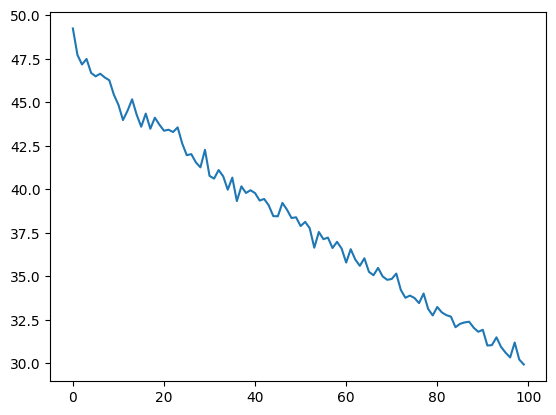

In [25]:
plt.plot(history.history["mse"])

KFOLD METHOD

In [26]:
# Import additionnal libraries

from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [27]:
validation_loss = []

In [28]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [29]:
count = 0

for train_index, val_index in kfold.split(X_train, y_train) :
    model = create_model()

    stop = EarlyStopping(monitor = "val_mse", patience = 10, mode = "min")
    checkpoint = ModelCheckpoint("my_best_model" + str(count) + ".keras", monitor = "val_mse", verbose = 0, save_best_only = True, mode = "min")
    callbacks = [stop, checkpoint]

    history = model.fit([X_train[train_index][:, i] for i in range (16)], y_train[train_index], epochs = 100, callbacks = callbacks,
                        validation_data = ([X_train[val_index][:, i] for i in range (16)], y_train[val_index]), batch_size = 10)
    
    model = load_model("my_best_model" + str(count) + ".keras")
    validation_loss.append(model.evaluate([X_train[val_index][:, i] for i in range (16)], y_train[val_index], return_dict = True, verbose = 0)["loss"])
    
    count += 1
    

c:\Users\natha\Documents\Programmation\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 164962.8750 - mse: 164962.8750 - val_loss: 86582.6016 - val_mse: 86582.6016
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 85116.7578 - mse: 85116.7578 - val_loss: 85844.8906 - val_mse: 85844.8906
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83731.9062 - mse: 83731.9062 - val_loss: 85653.1484 - val_mse: 85653.1484
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 81968.3984 - mse: 81968.3984 - val_loss: 87695.6562 - val_mse: 87695.6562
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 84229.8438 - mse: 84229.8438 - val_loss: 85921.6328 - val_mse: 85921.6328
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83711.4141 - mse: 83711.4141 - val_loss: 85746.7422 - val_mse: 85746.7422
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83169.5234 - mse: 83169.5234 - val_loss: 85323.7266 - val_mse: 85323.7266
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [37]:
all_model = []
for i in range (5) :
    all_model.append(load_model("my_best_model" + str(i) + ".keras"))

In [39]:
model_predict_moyenne = all_model[0].predict([X_test[:, i] for i in range (16)])

for i in range(1, 5) :
    model_predict_moyenne += all_model[i].predict([X_test[:, i] for i in range (16)])

model_predict_moyenne = np.round(model_predict_moyenne/10)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [41]:
y_test.shape

(1000,)

In [47]:
print("mse : ", (1/1000)*np.sqrt(np.sum((model_predict_moyenne[:, 0] - y_test)**2)))

mse :  10.753301201844199


In [56]:
np.array([model_predict_moyenne[:, 0], y_test])[:, :5]

array([[335.     , 233.     , 280.     , 152.     , 269.     ],
       [927.17741, 425.18517, 659.32114,  24.10143, 605.93609]])